# **Hệ thống phân tích hành vi mua sắm của khách hàng**


# Tiền xử lý dữ liệu

# Về bộ dữ liệu

## Giới thiệu

Tệp này chứa dữ liệu hành vi trong **5 tháng (tháng 10/2019 – tháng 2/2020)** từ một cửa hàng điện tử trực tuyến lớn.

Mỗi dòng trong tệp đại diện cho một sự kiện. Tất cả các sự kiện đều liên quan đến sản phẩm và người dùng. Mỗi sự kiện giống như một mối quan hệ nhiều-nhiều giữa sản phẩm và người dùng.

Dữ liệu được thu thập bởi dự án **Open CDP**. Bạn có thể thoải mái sử dụng nền tảng dữ liệu khách hàng mã nguồn mở này.
## Cách đọc dữ liệu

Có nhiều loại sự kiện khác nhau. Xem bên dưới.

**Cách hiểu dữ liệu:**

Ví dụ:  
Người dùng `user_id` trong phiên `user_session` đã **thêm vào giỏ hàng** (sự kiện `event_type` = `cart`) sản phẩm `product_id` thuộc thương hiệu `brand` trong danh mục `category_code`, với giá `price` vào thời điểm `event_time`.

---

## Cấu trúc tệp

| Thuộc tính      | Mô tả |
|-----------------|------|
| `event_time`      | Thời gian sự kiện xảy ra (theo UTC). |
| `event_type`      | Chỉ có một loại sự kiện: `purchase` (mua hàng). |
| `product_id`      | ID sản phẩm. |
| `category_id`     | ID danh mục sản phẩm. |
| `category_code`   | Phân loại sản phẩm (tên mã). Thường có cho các danh mục quan trọng, có thể bỏ qua cho phụ kiện. |
| `brand`           | Tên thương hiệu (chữ thường). Có thể bị thiếu. |
| `price`           | Giá sản phẩm (kiểu float). Luôn có. |
| `user_id`         | ID người dùng cố định. |
| `user_session`    | ID phiên làm việc tạm thời của người dùng. Mỗi phiên có ID riêng, sẽ thay đổi nếu người dùng rời khỏi và quay lại sau một thời gian dài. |

---

## Các loại sự kiện

- `view` - Người dùng đã xem sản phẩm
- `cart` - Người dùng thêm sản phẩm vào giỏ hàng
- `remove_from_cart` - Người dùng xóa sản phẩm khỏi giỏ hàng
- `purchase` - Người dùng mua sản phẩm

---

## Mua nhiều sản phẩm trong một phiên

Một phiên có thể có nhiều sự kiện mua hàng. Điều này hoàn toàn bình thường vì chúng đều thuộc một đơn hàng.

---

## Lời cảm ơn

Cảm ơn nền tảng tiếp thị **[REES46 Marketing Platform](https://rees46.com/)** đã cung cấp bộ dữ liệu này.

---

## Khám phá & Hiểu dữ liệu
### Tải dữ liệu

Đây là link tải tập dữ liệu: [https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-electronics-store](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-electronics-store)

In [25]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "events.csv"

# Load the latest version


In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mkechinov/ecommerce-events-history-in-electronics-store")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\PC\.cache\kagglehub\datasets\mkechinov\ecommerce-events-history-in-electronics-store\versions\1


### Load dữ liệu vào Dataframe

In [27]:
import pandas as pd

data = pd.read_csv('events.csv')


### Xem 5 dòng đầu của dữ liệu

In [28]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


### Hiển thị thông tin tổng quan về DataFrame

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


DataFrame có 885,129 dòng và 9 cột, với một số cột chứa giá trị thiếu (null) như `category_code`, `brand`, và `user_session`. Cần xử lý các giá trị thiếu này.


### Trả về tất cả các giá trị duy nhất có trong cột `event_type` của DataFrame.

In [30]:
data["event_type"].unique()

array(['view', 'cart', 'purchase'], dtype=object)

Mảng trả về các giá trị duy nhất trong cột `event_type`, bao gồm các sự kiện `view`, `cart` và `purchase`. Nhưng không có sự kiện `remove_from_cart` như ban đầu được mô tả.

### Hiển thị các thống kê mô tả (mean, std, min, 25%, 50%, 75%, max) cho các cột số trong DataFrame.

Mô tả thống kê cột `price` cho thấy giá trị trung bình là 146.33, với độ lệch chuẩn khá lớn (296.81), giá trị thấp nhất là 0.22 và giá trị cao nhất là 64771.06.


## Làm sạch dữ liệu


### Tính tổng số giá trị thiếu (NaN) trong mỗi cột của DataFrame.

In [31]:
data.isna().sum() 

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64

### Liệt kê event_type ở những sự kiện có user_session rỗng

In [32]:
data[data['user_session'].isna()]['event_type'].unique()

array(['view', 'cart'], dtype=object)

user_session chỉ thiếu 165 giá trị trên tổng số 885,129 dòng, tức là thiếu rất rất ít (~0.0186%). Và đặc biệt là chỉ là `view` và `cart` không làm ảnh hưởng đến **lợi nhuận** nên mình sẽ bỏ các dòng dữ liệu này.

### Xóa các dòng mà cột `user_session` không có giá trị

In [33]:
data = data.dropna(subset=['user_session'])

### Điền giá trị 'unknown' vào các ô bị thiếu trong cột `category_code` và `brand` của DataFrame.


In [34]:
# Điền category_code
data['category_code'] = data['category_code'].fillna('unknown')
# Điền brand
data['brand'] = data['brand'].fillna('unknown')

# Đếm giá trị thiếu
missing_values = data.isna().sum()
print(missing_values)


event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64


## 	Biến đổi dữ liệu

### Chuyển đổi cột `event_time` thành kiểu dữ liệu datetime để dễ dàng xử lý thời gian.


In [35]:
data['event_time'] = pd.to_datetime(data['event_time'])

# kiểm tra lại kiểu dữ liệu
data.dtypes

event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
dtype: object

In [36]:
data.describe()

,product_id,category_id,price,user_id
count,8.849640e+05,8.849640e+05,884964.000000,8.849640e+05
mean,1.906619e+06,2.144423e+18,146.320109,1.515916e+18
std,1.458717e+06,6.165680e+14,296.793600,3.554126e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452884e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


In [37]:
data['year'] = data['event_time'].dt.year
data['month'] = data['event_time'].dt.month
data['day'] = data['event_time'].dt.day
data['quarter'] = data['event_time'].dt.quarter
data['week'] = data['event_time'].dt.isocalendar().week
data['weekday'] = data['event_time'].dt.weekday
data['dayofyear'] = data['event_time'].dt.dayofyear

data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,year,month,day,quarter,week,weekday,dayofyear
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT,2020,9,24,3,39,3,268
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020,9,24,3,39,3,268
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy,2020,9,24,3,39,3,268
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020,9,24,3,39,3,268
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020,9,24,3,39,3,268


### Chuyển đổi các cột `product_id`, `category_id`, `user_id` sang kiểu dữ liệu `object`

Mục đích là chỉ để lại những cột kiểu số mang mục tiêu tính toán bởi vậy chuyển kiểu cho cột `product_id`, `category_id` và `user_id`.

In [38]:
data['product_id'] = data['product_id'].astype('object')
data['category_id'] = data['category_id'].astype('object')
data['user_id'] = data['user_id'].astype('object')

## Mở rộng dữ liệu 

### Kiểm tra số lượng cấp độ con tối đa trong `category_code`

In [39]:
# Check is category_code have more than 3 sub category exists
category_code_list = data['category_code']

maxSub = 0

for code in category_code_list:
    numSub = len(code.split('.'))
    if (maxSub < numSub): maxSub = numSub

print(maxSub)
# maximum number of subcategory is 4

4


Tối đa là 4 cấp nên mình sẽ chọn cách đơn giản là tạo ra 4 cột `category`, `sub_category`, `sub_sub_category`, và `sub_sub_sub_category`.

### Tách chúng thành 4 cột: `category`, `sub_category`, `sub_sub_category`, và `sub_sub_sub_category`.

In [40]:
data[['category', 'sub_category', 'sub_sub_category', 'sub_sub_sub_category']] = (
    pd.DataFrame([
        (category_code_list.get(idx, '0').split('.') + ['0', '0', '0', '0'])[:4]
        for idx in data.index
    ], index=data.index)
)


### Kiểm tra lại dữ liệu đã được mở rộng

In [41]:
print(data.dtypes)
data.head(10) 

event_time              datetime64[ns, UTC]
event_type                           object
product_id                           object
category_id                          object
category_code                        object
brand                                object
price                               float64
user_id                              object
user_session                         object
year                                  int32
month                                 int32
day                                   int32
quarter                               int32
week                                 UInt32
weekday                               int32
dayofyear                             int32
category                             object
sub_category                         object
sub_sub_category                     object
sub_sub_sub_category                 object
dtype: object


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,year,month,day,quarter,week,weekday,dayofyear,category,sub_category,sub_sub_category,sub_sub_sub_category
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,unknown,31.90,1515915625519388267,LJuJVLEjPT,2020,9,24,3,39,3,268,electronics,telephone,0,0
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020,9,24,3,39,3,268,computers,components,cooler,0
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,unknown,unknown,9.81,1515915625513238515,4TMArHtXQy,2020,9,24,3,39,3,268,unknown,0,0,0
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020,9,24,3,39,3,268,computers,peripherals,printer,0
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,unknown,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020,9,24,3,39,3,268,unknown,0,0,0
5,2020-09-24 11:57:59+00:00,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW,2020,9,24,3,39,3,268,construction,tools,saw,0
6,2020-09-24 11:58:23+00:00,view,3791349,2144415935086199225,computers.desktop,unknown,215.41,1515915625519388877,J1t6sIYXiV,2020,9,24,3,39,3,268,computers,desktop,0,0
7,2020-09-24 11:58:24+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388882,kVBeYDPcBw,2020,9,24,3,39,3,268,computers,network,router,0
8,2020-09-24 11:58:25+00:00,view,657859,2144415939431498289,unknown,unknown,34.17,1515915625519320570,HEl15U7JVy,2020,9,24,3,39,3,268,unknown,0,0,0
9,2020-09-24 11:58:31+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388929,F3VB9LYp39,2020,9,24,3,39,3,268,computers,network,router,0


### In ra số lượng giá trị duy nhất (nunique) trong từng cấp phân loại: `category`, `sub_category`, `sub_sub_category`, và `sub_sub_sub_category`.

In [42]:
print(
f'''
Categories: {data['category'].nunique()}
SubCategory: {data['sub_category'].nunique()}
SubSubCategory: {data['sub_sub_category'].nunique()}
SubSubSubCategory: {data['sub_sub_sub_category'].nunique()}
'''
)


Categories: 15
SubCategory: 43
SubSubCategory: 78
SubSubSubCategory: 2



## Phân tích và trực quan hóa

### Dataset có bao nhiêu dòng, bao nhiêu user và bao nhiêu sản phẩm ?

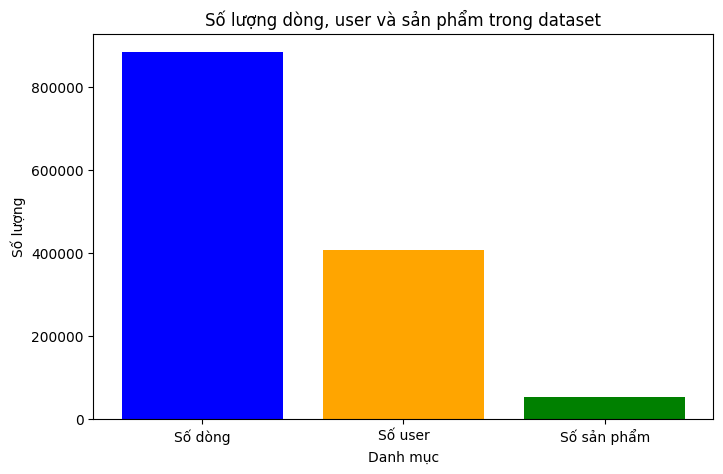

In [43]:
import matplotlib.pyplot as plt

# Tính toán số lượng
num_rows = len(data)
num_users = data['user_id'].nunique()
num_products = data['product_id'].nunique()

# Chuẩn bị dữ liệu cho biểu đồ
categories = ['Số dòng', 'Số user', 'Số sản phẩm']
values = [num_rows, num_users, num_products]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'orange', 'green'])
plt.title('Số lượng dòng, user và sản phẩm trong dataset')
plt.ylabel('Số lượng')
plt.xlabel('Danh mục')
plt.show()

### Nhận xét biểu đồ

Biểu đồ trên cho thấy số lượng dòng dữ liệu, số lượng người dùng và số lượng sản phẩm trong dataset.
- **Số dòng**: Tổng số dòng dữ liệu là 884,964, đại diện cho các sự kiện.
- **Số user**: Có 407,237 người dùng duy nhất.
- **Số sản phẩm**: Có 53,452 sản phẩm duy nhất.

Điều này cho thấy dataset có quy mô lớn và đa dạng về người dùng cũng như sản phẩm.

### Thời gian bắt đầu và kết thúc của dữ liệu là khi nào?

In [44]:
# Lấy thời gian bắt đầu và kết thúc
start_time = data['event_time'].min()
end_time = data['event_time'].max()

print(f"Thời gian bắt đầu: {start_time}")
print(f"Thời gian kết thúc: {end_time}")


Thời gian bắt đầu: 2020-09-24 11:57:06+00:00
Thời gian kết thúc: 2021-02-28 23:59:09+00:00


### Nhận xét

Dữ liệu bắt đầu từ ngày 24/09/2020 và kết thúc vào ngày 28/02/2021.
Khoảng thời gian này bao gồm các tháng cuối năm 2020 và đầu năm 2021, có thể phản ánh các xu hướng mua sắm trong mùa lễ hội và đầu năm mới.

### Có bao nhiêu loại sự kiện và tỷ lệ từng loại?

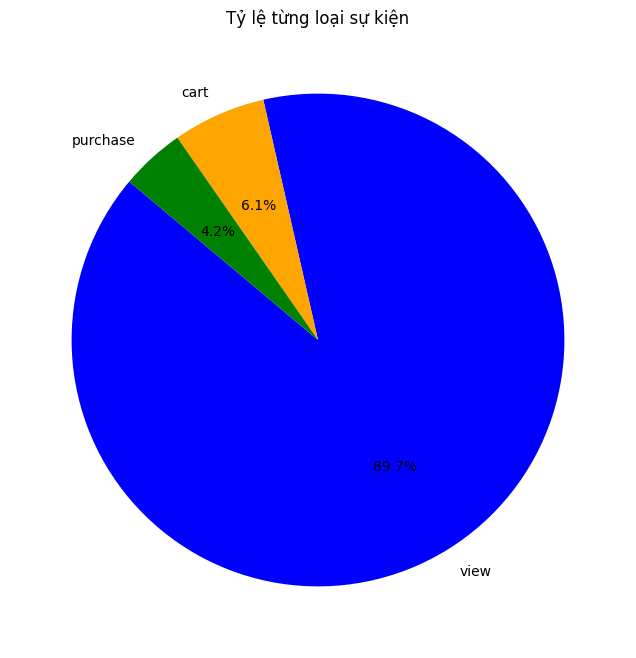

In [45]:
# Đếm số lượng từng loại sự kiện
event_counts = data['event_type'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(event_counts, labels=event_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red'])
plt.title('Tỷ lệ từng loại sự kiện')
plt.show()

### Nhận xét biểu đồ

Biểu đồ tròn trên minh họa tỷ lệ phần trăm của từng loại sự kiện trong dataset:
- **`view`** chiếm tỷ lệ lớn nhất (89.7%), cho thấy phần lớn các sự kiện là người dùng xem sản phẩm.
- **`cart`** chiếm 6.1%, thể hiện số lượng sự kiện người dùng thêm sản phẩm vào giỏ hàng.
- **`purchase`** chiếm 4.2%, cho thấy số lượng sự kiện mua hàng là nhỏ nhất.

Nhận xét:
- Tỷ lệ sự kiện `view` áp đảo, điều này có thể phản ánh hành vi phổ biến của người dùng là chỉ xem sản phẩm mà không thực hiện hành động tiếp theo.
- Tỷ lệ `cart` và `purchase` thấp hơn nhiều, điều này có thể gợi ý cần cải thiện trải nghiệm mua sắm để tăng tỷ lệ chuyển đổi từ xem sản phẩm sang mua hàng.

### Số lượng các sự kiện theo ngày/tháng có biến động thế nào?

C:\Users\PC\AppData\Local\Temp\ipykernel_14576\3519762086.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['event_month'] = data['event_time'].dt.to_period('M')  # Lấy tháng


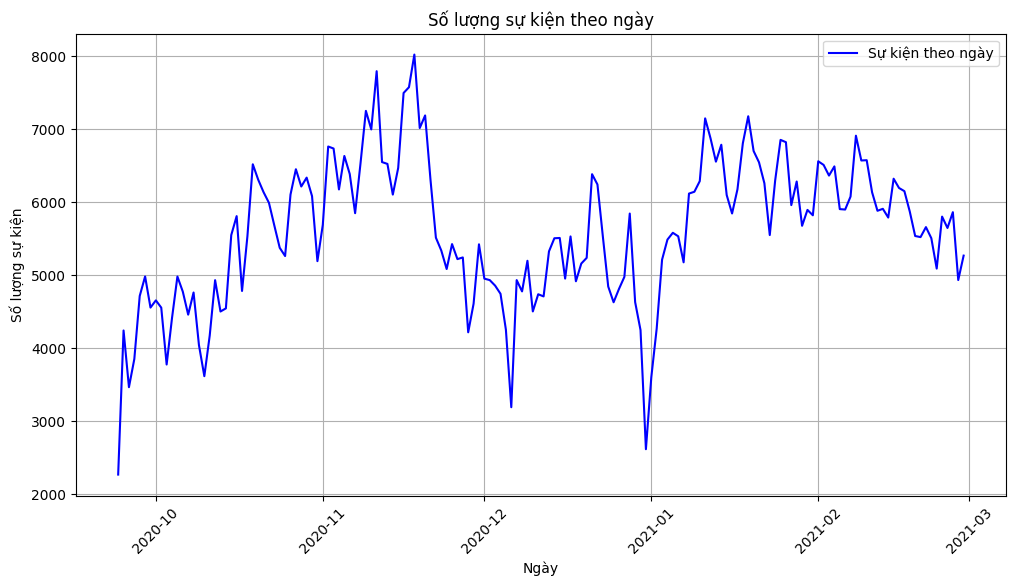

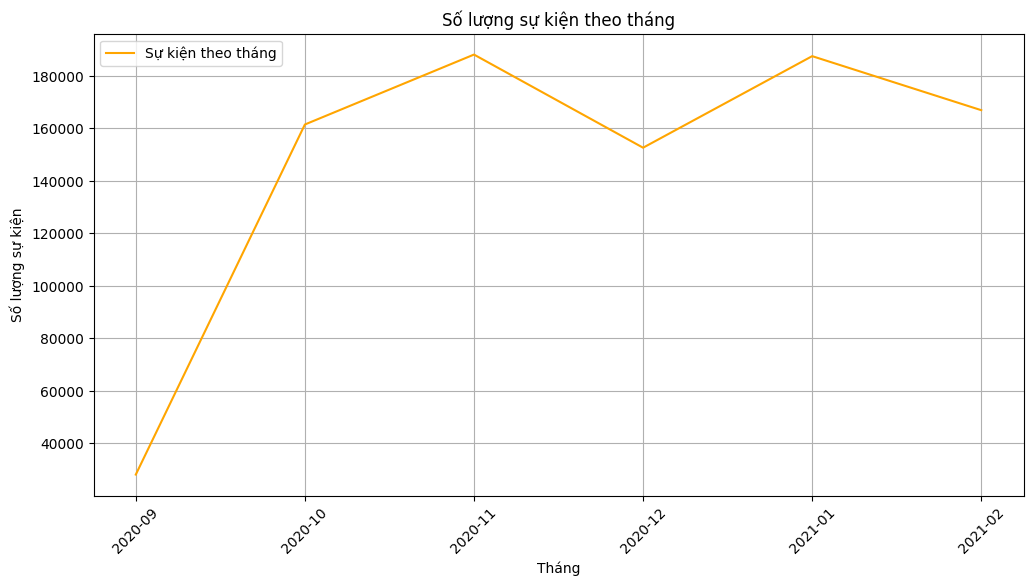

In [46]:
# Tạo cột ngày và tháng từ cột 'event_time'
data['event_date'] = data['event_time'].dt.date  # Lấy ngày
data['event_month'] = data['event_time'].dt.to_period('M')  # Lấy tháng

# Đếm số lượng sự kiện theo ngày
events_per_day = data.groupby('event_date').size()

# Đếm số lượng sự kiện theo tháng
events_per_month = data.groupby('event_month').size()

# Vẽ biểu đồ đường cho số lượng sự kiện theo ngày
plt.figure(figsize=(12, 6))
plt.plot(events_per_day.index, events_per_day.values, label='Sự kiện theo ngày', color='blue')
plt.title('Số lượng sự kiện theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Số lượng sự kiện')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ đường cho số lượng sự kiện theo tháng
plt.figure(figsize=(12, 6))
plt.plot(events_per_month.index.astype(str), events_per_month.values, label='Sự kiện theo tháng', color='orange')
plt.title('Số lượng sự kiện theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số lượng sự kiện')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Nhận xét biểu đồ

#### Biểu đồ 1: Số lượng sự kiện theo ngày
- Biểu đồ đường cho thấy sự biến động hàng ngày của số lượng sự kiện.
- Có sự tăng trưởng rõ rệt từ đầu tháng 10/2020 đến giữa tháng 11/2020.
- Sau đó, số lượng sự kiện dao động với các đỉnh và đáy rõ ràng, đặc biệt giảm mạnh vào cuối tháng 12/2020 (có thể do kỳ nghỉ lễ).
- Từ tháng 1/2021 đến tháng 2/2021, số lượng sự kiện có xu hướng giảm dần.

#### Biểu đồ 2: Số lượng sự kiện theo tháng
- Số lượng sự kiện tăng mạnh từ tháng 10/2020 và đạt đỉnh vào tháng 11/2020.
- Tháng 12/2020 có sự giảm nhẹ, nhưng tăng trở lại vào tháng 1/2021.
- Tháng 2/2021 ghi nhận sự giảm sút so với các tháng trước.

### Tổng kết
- Số lượng sự kiện có xu hướng tăng mạnh vào các tháng cuối năm (tháng 10 và 11), có thể do các chương trình khuyến mãi hoặc mùa mua sắm cuối năm.
- Sự giảm sút vào tháng 12/2020 và tháng 2/2021 có thể liên quan đến các yếu tố như kỳ nghỉ lễ hoặc giảm nhu cầu mua sắm.

### Mỗi người dùng trung bình tương tác bao nhiêu lần?

### Mỗi người dùng trung bình tương tác bao nhiêu lần?

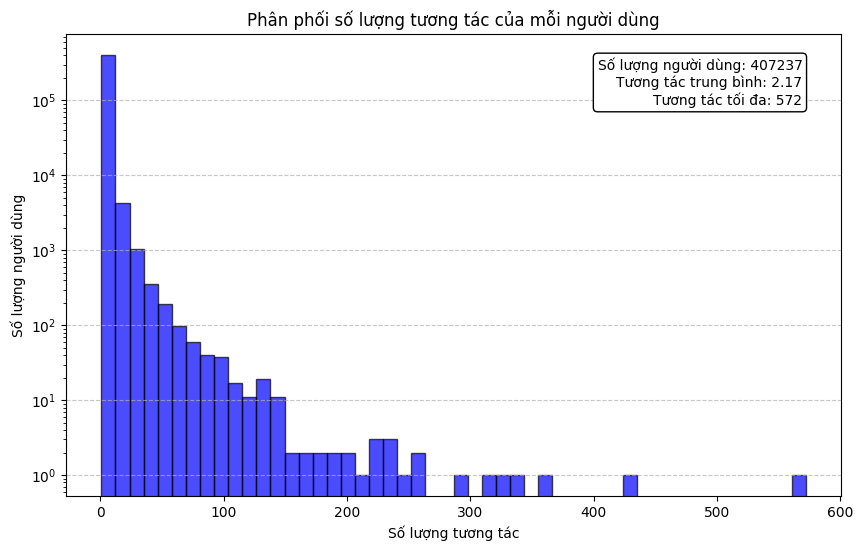

In [47]:

# Gom nhóm từng user và đếm tổng số tương tác của mỗi người
user_interactions = data.groupby('user_id').size()

# Tính toán thông tin cơ bản
num_users = len(user_interactions)
avg_interactions = user_interactions.mean()
max_interactions = user_interactions.max()


# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(user_interactions, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Phân phối số lượng tương tác của mỗi người dùng')
plt.xlabel('Số lượng tương tác')
plt.ylabel('Số lượng người dùng')
plt.yscale('log')  # Sử dụng log scale để dễ quan sát hơn nếu dữ liệu phân phối không đều
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm chú thích vào biểu đồ
plt.text(0.95, 0.95, 
         f"Số lượng người dùng: {num_users}\n"
         f"Tương tác trung bình: {avg_interactions:.2f}\n"
         f"Tương tác tối đa: {max_interactions}", 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         verticalalignment='top', 
         horizontalalignment='right', 
         bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Hiển thị biểu đồ
plt.show()

### Nhận xét biểu đồ

Biểu đồ trên minh họa **phân phối số lượng tương tác của mỗi người dùng** với các nhận xét sau:

1. **Phân phối lệch phải**:
   - Phần lớn người dùng có số lượng tương tác rất thấp, tập trung ở khoảng 0-10 tương tác.
   - Số lượng người dùng giảm dần khi số lượng tương tác tăng lên.

2. **Số liệu thống kê**:
   - Tổng số người dùng: **407,237**.
   - Số lượng tương tác trung bình: **2.17**.
   - Số lượng tương tác tối đa: **572**.

3. **Ý nghĩa**:
   - Phần lớn người dùng chỉ tương tác một vài lần, điều này có thể phản ánh hành vi phổ biến là người dùng chỉ xem sản phẩm mà không thực hiện nhiều hành động khác.
   - Một số ít người dùng có số lượng tương tác rất cao, có thể là khách hàng trung thành hoặc người dùng có hành vi mua sắm tích cực.

4. **Hướng cải thiện**:
   - Cần tập trung vào việc tăng số lượng tương tác của nhóm người dùng có tương tác thấp, ví dụ bằng cách cải thiện trải nghiệm người dùng hoặc triển khai các chương trình khuyến mãi.

### Có bao nhiêu người dùng chỉ xem mà không mua?

In [48]:
# Lọc người dùng chỉ có sự kiện 'view' và không có 'purchase'
users_only_view = data.groupby('user_id')['event_type'].apply(lambda x: set(x) == {'view'})

# Đếm số lượng người dùng chỉ xem
num_users_only_view = users_only_view.sum()

print(f"Số lượng người dùng chỉ xem mà không mua: {num_users_only_view}")

Số lượng người dùng chỉ xem mà không mua: 369040


### Top 10 danh mục được mua từ lần đầu

Danh mục được mua từ lần đầu:
category
computers       225
unknown         132
electronics     101
stationery       42
auto             15
appliances       13
construction     11
furniture         4
accessories       1
Name: count, dtype: int64
Số lượng danh mục được mua từ lần đầu: 9


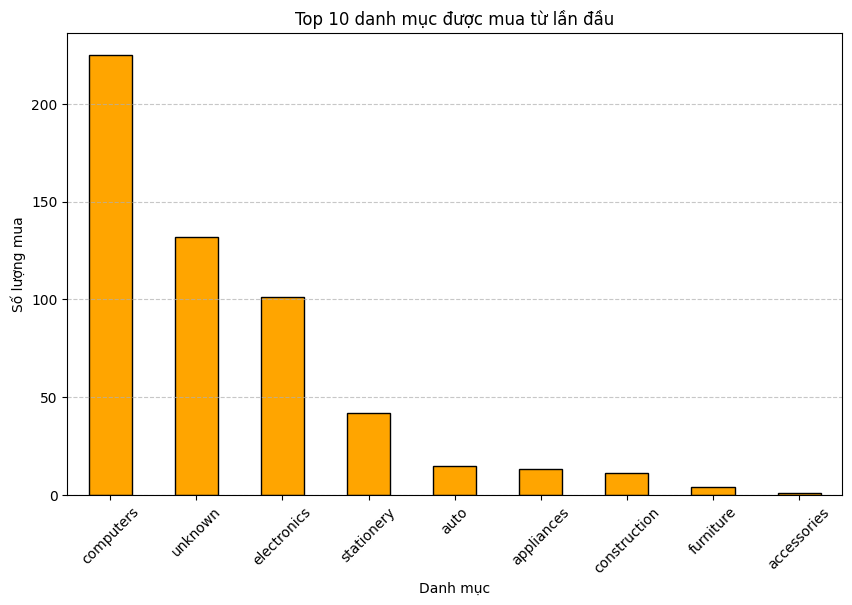

In [49]:
# Lọc người dùng mua hàng từ lần đầu tiên xem
first_event = data.groupby('user_id').first()  # Lấy sự kiện đầu tiên của mỗi người dùng
categories_purchased_first_view = first_event[first_event['event_type'] == 'purchase']

# Lấy danh sách các danh mục được mua từ lần đầu
purchased_categories = categories_purchased_first_view['category'].value_counts()

# In kết quả
print("Danh mục được mua từ lần đầu:")
print(purchased_categories)


num_categories = purchased_categories.count()
print(f"Số lượng danh mục được mua từ lần đầu: {num_categories}")

# Trực quan hóa top 10 danh mục được mua từ lần đầu
top_10_categories = purchased_categories.head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 danh mục được mua từ lần đầu')
plt.xlabel('Danh mục')
plt.ylabel('Số lượng mua')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Nhận xét biểu đồ

Biểu đồ trên minh họa **Top 10 danh mục được mua từ lần đầu** với các nhận xét sau:

1. **Danh mục nổi bật**:
   - **`computers`** là danh mục được mua nhiều nhất từ lần đầu, với hơn 200 lượt mua.
   - **`unknown`** và **`electronics`** lần lượt đứng thứ hai và thứ ba, với số lượng mua đáng kể.

2. **Danh mục ít phổ biến hơn**:
   - Các danh mục như **`stationery`**, **`auto`**, **`appliances`**, và **`construction`** có số lượng mua thấp hơn nhiều.
   - **`furniture`** và **`accessories`** có số lượng mua rất ít, gần như không đáng kể.

3. **Ý nghĩa**:
   - Danh mục **`computers`** và **`electronics`** chiếm ưu thế, cho thấy người dùng có xu hướng mua các sản phẩm công nghệ cao ngay từ lần đầu.
   - Sự xuất hiện của **`unknown`** cho thấy có một số dữ liệu chưa được phân loại rõ ràng, cần được kiểm tra và xử lý.

4. **Hướng cải thiện**:
   - Tăng cường quảng bá các danh mục ít phổ biến hơn như **`stationery`**, **`furniture`**, và **`accessories`** để thu hút sự chú ý của người dùng.
   - Xử lý và phân loại lại các sản phẩm thuộc danh mục **`unknown`** để có cái nhìn rõ ràng hơn về hành vi mua sắm.

### Sản phẩm nào được xem nhiều nhất?

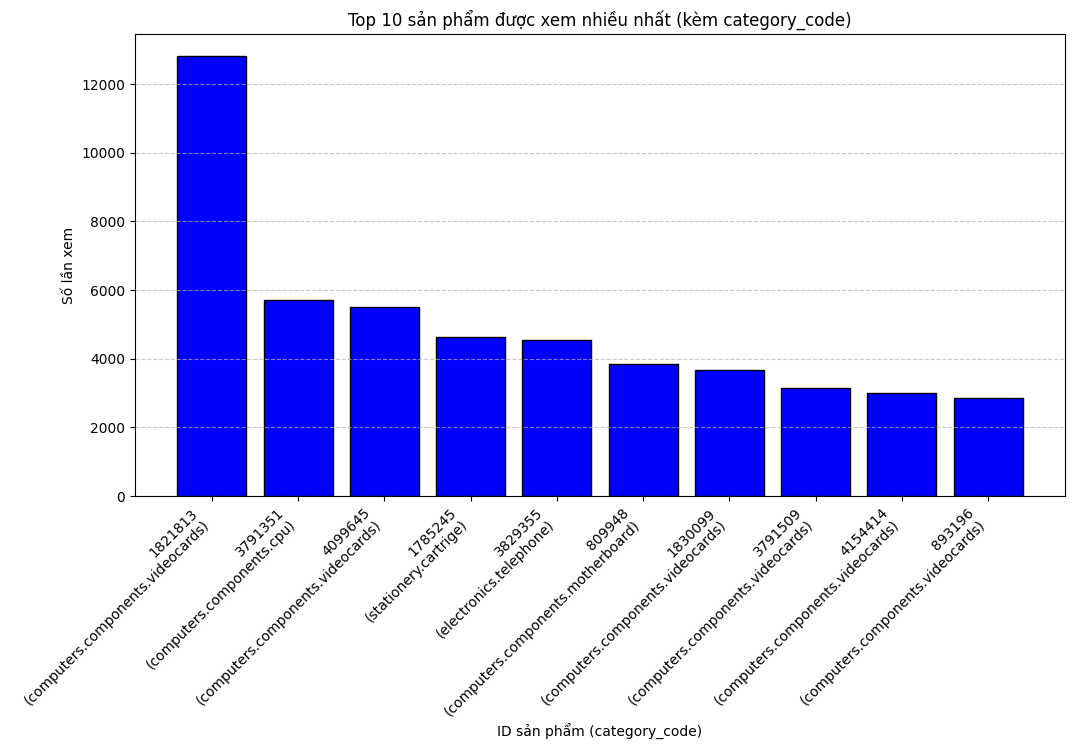

In [50]:
# Đếm số lần mỗi sản phẩm được xem
most_viewed_products = data[data['event_type'] == 'view']['product_id'].value_counts()

# Lấy top 10 sản phẩm được xem nhiều nhất
top_10_viewed = most_viewed_products.head(10)

# Lấy category_code tương ứng cho các sản phẩm được xem nhiều nhất
viewed_categories = data[data['product_id'].isin(top_10_viewed.index)][['product_id', 'category_code']].drop_duplicates()

# Tạo từ điển {product_id: category_code} cho các sản phẩm được xem nhiều nhất
viewed_dict = dict(zip(viewed_categories['product_id'], viewed_categories['category_code']))

# Trực quan hóa sản phẩm được xem nhiều nhất
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_10_viewed_labels = [f"{pid}\n({viewed_dict.get(pid, 'unknown')})" for pid in top_10_viewed.index]
plt.bar(top_10_viewed_labels, top_10_viewed.values, color='blue', edgecolor='black')
plt.title('Top 10 sản phẩm được xem nhiều nhất (kèm category_code)')
plt.xlabel('ID sản phẩm (category_code)')
plt.ylabel('Số lần xem')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Nhận xét: 
1. **Sản phẩm nổi bật**:
   - Sản phẩm có ID `182213` thuộc danh mục **`computers.components.video`** được xem nhiều nhất, với hơn 12,000 lượt xem.
   - Các sản phẩm còn lại có lượt xem dao động từ 2,000 đến 6,000, chủ yếu thuộc danh mục **`computers.components`** và **`electronics.telephony`**.

2. **Ý nghĩa**:
   - Sản phẩm thuộc danh mục **`computers.components`** chiếm ưu thế, cho thấy người dùng có xu hướng tìm kiếm và xem các sản phẩm liên quan đến linh kiện máy tính.
   - Sản phẩm thuộc danh mục **`electronics.telephony`** cũng có lượt xem đáng kể, phản ánh sự quan tâm đến các thiết bị điện tử.

3. **Hướng cải thiện**:
   - Tăng cường quảng bá các sản phẩm ít được xem hơn để thu hút sự chú ý của người dùng.
   - Phân tích thêm lý do tại sao sản phẩm `182213` có lượt xem vượt trội để áp dụng chiến lược tương tự cho các sản phẩm khác.

---

### Sản phẩm nào được mua nhiều nhất?

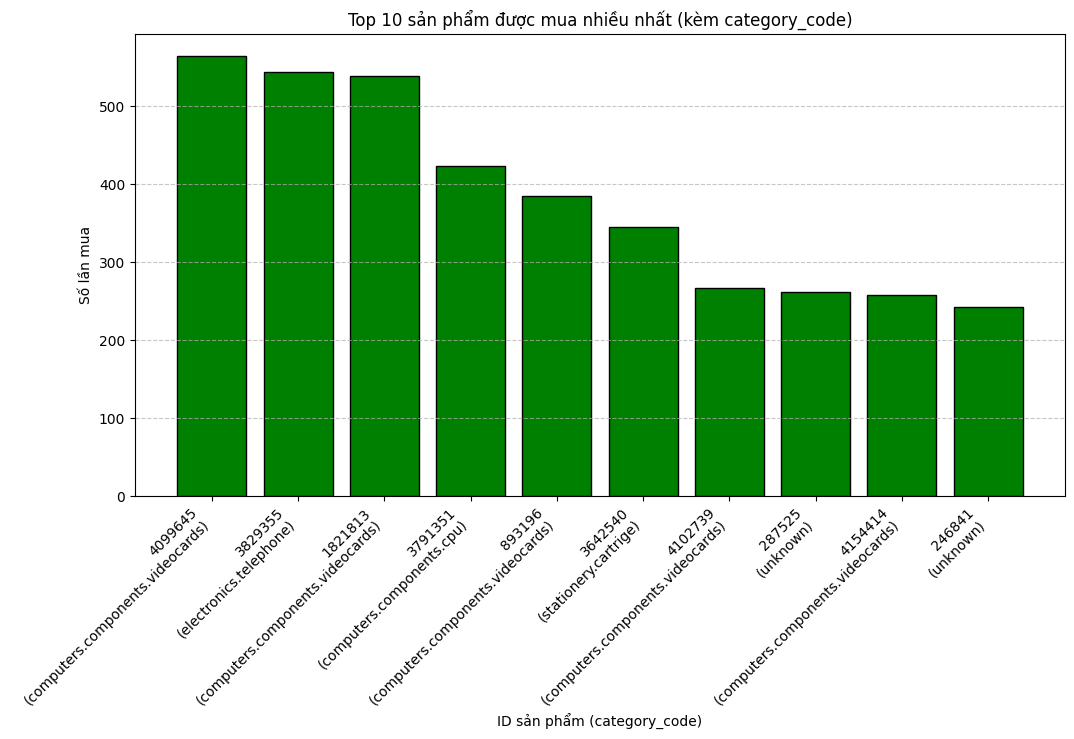

In [51]:
# Đếm số lần mỗi sản phẩm được mua
most_purchased_products = data[data['event_type'] == 'purchase']['product_id'].value_counts()

# Lấy top 10 sản phẩm được mua nhiều nhất
top_10_purchased = most_purchased_products.head(10)

# Lấy category_code tương ứng cho các sản phẩm được mua nhiều nhất
purchased_categories = data[data['product_id'].isin(top_10_purchased.index)][['product_id', 'category_code']].drop_duplicates()

# Tạo từ điển {product_id: category_code} cho các sản phẩm được mua nhiều nhất
purchased_dict = dict(zip(purchased_categories['product_id'], purchased_categories['category_code']))

# Trực quan hóa sản phẩm được mua nhiều nhất
plt.figure(figsize=(12, 6))
top_10_purchased_labels = [f"{pid}\n({purchased_dict.get(pid, 'unknown')})" for pid in top_10_purchased.index]
plt.bar(top_10_purchased_labels, top_10_purchased.values, color='green', edgecolor='black')
plt.title('Top 10 sản phẩm được mua nhiều nhất (kèm category_code)')
plt.xlabel('ID sản phẩm (category_code)')
plt.ylabel('Số lần mua')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Nhận xét:
1. **Sản phẩm nổi bật**:
   - Sản phẩm có ID `403665` và `390215` thuộc danh mục **`computers.components.video`** được mua nhiều nhất, với hơn 500 lượt mua.
   - Các sản phẩm còn lại có lượt mua dao động từ 200 đến 500, chủ yếu thuộc danh mục **`computers.components`**, **`electronics.telephony`**, và một số sản phẩm không rõ danh mục (**`unknown`**).

2. **Ý nghĩa**:
   - Sản phẩm thuộc danh mục **`computers.components`** tiếp tục chiếm ưu thế, cho thấy người dùng không chỉ xem mà còn mua nhiều sản phẩm trong danh mục này.
   - Sự xuất hiện của sản phẩm thuộc danh mục **`unknown`** cho thấy cần kiểm tra và phân loại lại dữ liệu để hiểu rõ hơn về hành vi mua sắm.

3. **Hướng cải thiện**:
   - Tăng cường quảng bá các sản phẩm có lượt mua thấp hơn để cải thiện doanh số.
   - Xử lý và phân loại lại các sản phẩm thuộc danh mục **`unknown`** để có cái nhìn rõ ràng hơn về hành vi mua sắm.

## Phân tích Customer Retention Rate (Tỷ lệ giữ chân khách hàng)

### 1. Mục tiêu
Phân tích tỷ lệ khách hàng quay lại mua hàng từ lần thứ hai trở đi, nhằm:
- Đo lường mức độ trung thành của khách hàng.
- Hiểu hành vi mua lại: khách hàng thường quay lại sau bao nhiêu ngày.
- Xác định các phân khúc sản phẩm hoặc thời điểm có tỷ lệ giữ chân tốt.

### 2. Định nghĩa KPI
Customer Retention Rate được tính bằng công thức:

$$
\text{Customer Retention Rate} = \frac{\text{Số lượng khách hàng đã mua} \geq 2 \text{ lần}}{\text{Số lượng khách hàng đã mua ít nhất 1 lần}}
$$

Trong đó:
- **Returning Users**: người dùng đã thực hiện từ 2 lần mua trở lên.
- **Purchasing Users**: người dùng đã thực hiện ít nhất 1 lần mua.


Ngoài ra, cần phải phân tích thêm:
- **Khoảng cách thời gian** giữa lần mua thứ nhất và lần mua thứ hai.
- **Cohort Retention Analysis** theo tháng mua đầu tiên.

### 3. Phương pháp triển khai
- Lọc sự kiện `purchase` từ dữ liệu hành vi người dùng.
- Tính số lần mua của từng người dùng.
- Tính khoảng cách ngày giữa các lần mua.
- Phân tích Cohort để loại trừ độ lệch thời gian thu thập.
- So sánh Retention Rate theo các phân khúc sản phẩm, giá bán và thời gian trong ngày.
- Visualize bằng biểu đồ cột, histogram, heatmap và retention curve.

### 4. Ý nghĩa kinh doanh
Việc phân tích Customer Retention Rate giúp:
- Đánh giá hiệu quả của sản phẩm và trải nghiệm người dùng.
- Xác định thời điểm thích hợp để thực hiện remarketing, gửi ưu đãi giữ chân khách hàng.
- Ưu tiên các nhóm sản phẩm, thương hiệu, hoặc thời điểm có khả năng tạo giá trị lâu dài cao hơn.


#### Tổng quan về retention rate

In [80]:
purchases = data[data['event_type'] == 'purchase']
order_counts = purchases.groupby(['user_id','user_session']).size().groupby('user_id').size()
total_purchasing_users = (order_counts >= 1).sum()
users_with_multiple_orders = (order_counts >= 2).sum()

# Tính retention
retention_rate = users_with_multiple_orders / total_purchasing_users
print(f"Retention Rate (theo đơn hàng): {retention_rate:.2%}")




Retention Rate (theo đơn hàng): 11.69%


### Nhận xét kết quả Customer Retention Rate


Tỷ lệ 11.69% cho thấy rằng trong số những khách hàng đã từng mua ít nhất một đơn hàng, chỉ có khoảng 1/9 số khách thực sự quay lại mua thêm đơn hàng thứ hai trở lên. Đây là một mức retention khá thấp nếu so sánh với kỳ vọng thông thường trong ngành thương mại điện tử.

Điều này phù hợp với đặc thù của ngành điện tử tiêu dùng:
- Các sản phẩm điện tử như điện thoại, máy tính bảng, thiết bị mạng có vòng đời dài.
- Khách hàng không thường xuyên mua lại ngay trong thời gian ngắn.
- Giá trị đơn hàng cao khiến hành vi tái mua ít phổ biến hơn so với ngành FMCG (hàng tiêu dùng nhanh).

Ngoài ra, thời gian thu thập dữ liệu tương đối ngắn (từ tháng 10/2019 đến tháng 2/2020) có thể chưa đủ để quan sát đầy đủ hành vi mua lại của khách hàng.



### Phân tích khoảng thời gian giữa lần mua đầu tiên và lần mua thứ hai

#### Mục tiêu
Xác định số ngày trung bình và trung vị giữa lần mua đầu tiên và lần mua thứ hai của mỗi người dùng.  
Từ đó tìm ra thời điểm tối ưu để thực hiện các chiến dịch chăm sóc khách hàng sau lần mua đầu tiên.

In [ ]:
# Gom lần đầu tiên mỗi session (lấy thời điểm đầu tiên trong mỗi session)
session_first_purchase = purchases.groupby(['user_id', 'user_session'])['event_time'].min().reset_index()
session_first_purchase = session_first_purchase.sort_values(['user_id', 'event_time'])

# Tính toán số lượng session cho mỗi user
session_counts = session_first_purchase.groupby('user_id').size()
multi_session_users = session_counts[session_counts >= 2].index

# Lọc ra những user có >=2 session
session_first_purchase = session_first_purchase[session_first_purchase['user_id'].isin(multi_session_users)]
print("=== Dữ liệu session_first_purchase sau khi lọc những user có >=2 session ===")
print(session_first_purchase.head())

=== Dữ liệu session_first_purchase sau khi lọc những user có >=2 session ===
                user_id user_session                event_time
6   1515915625354561351   M4JERvJr9C 2020-09-25 08:40:03+00:00
7   1515915625354561351   UhhPeUCUpG 2020-10-02 07:32:16+00:00
10  1515915625355179497   3gcVmgjBEy 2020-11-04 15:58:43+00:00
11  1515915625355179497   BRxZes0EhA 2020-11-04 17:27:36+00:00
13  1515915625355398801   8MUVGuak80 2020-10-03 10:08:23+00:00


In [88]:
# Gom danh sách thời gian mua theo user
purchase_times_per_user = session_first_purchase.groupby('user_id')['event_time'].apply(list)
print(purchase_times_per_user)
print('----------------------------------------------------------------')

# Lấy 2 lần mua đầu tiên
first_two_purchases = purchase_times_per_user.apply(lambda x: pd.Series(x[:2]))
first_two_purchases.columns = ['first_purchase_time', 'second_purchase_time']

# Tính số ngày chênh lệch
days_between = (first_two_purchases['second_purchase_time'] - first_two_purchases['first_purchase_time']).dt.days

# Loại bỏ chênh lệch ≤ 0 ngày (trùng phiên)
days_between = days_between[days_between > 0]
print(days_between.describe())



user_id
1515915625354561351    [2020-09-25 08:40:03+00:00, 2020-10-02 07:32:1...
1515915625355179497    [2020-11-04 15:58:43+00:00, 2020-11-04 17:27:3...
1515915625355398801    [2020-10-03 10:08:23+00:00, 2020-10-23 09:41:5...
1515915625355805313    [2020-09-29 08:52:33+00:00, 2020-09-29 11:54:4...
1515915625363419728    [2020-09-27 09:42:33+00:00, 2020-09-27 12:29:1...
                                             ...                        
1515915625610560866    [2021-02-27 21:35:10+00:00, 2021-02-27 21:41:4...
1515915625610572386    [2021-02-27 22:24:34+00:00, 2021-02-27 22:33:0...
1515915625610872455    [2021-02-28 14:12:27+00:00, 2021-02-28 15:43:2...
1515915625610968614    [2021-02-28 18:59:49+00:00, 2021-02-28 19:03:4...
1515915625610999486    [2021-02-28 21:01:52+00:00, 2021-02-28 21:03:0...
Name: event_time, Length: 2491, dtype: object
----------------------------------------------------------------
count    801.000000
mean      11.415730
std       16.214984
min        1.00000

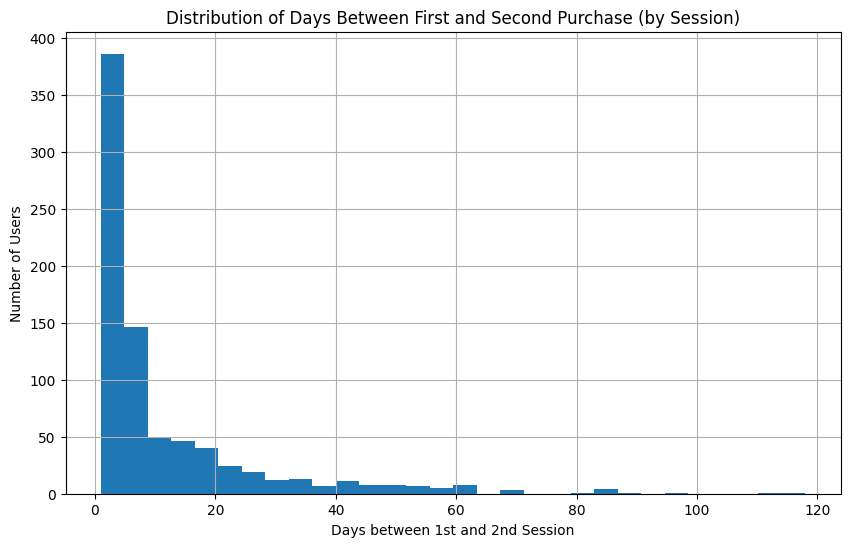

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
days_between.hist(bins=30)
plt.title('Distribution of Days Between First and Second Purchase (by Session)')
plt.xlabel('Days between 1st and 2nd Session')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


### Nhận xét kết quả khoảng thời gian giữa lần mua đầu tiên và lần mua thứ hai

#### 1. Kết quả tổng quan

Sau khi loại bỏ những lần mua có khoảng cách 0 ngày (chỉ giữ khoảng cách > 0 ngày), thống kê cho thấy:

| Thống kê | Giá trị |
|:---|:---|
| Số lượng user (count) | 801 |
| Thời gian quay lại trung bình (mean) | 11.42 ngày |
| Thời gian quay lại trung vị (50%) | 5 ngày |
| 25% user quay lại trong vòng | 2 ngày |
| 75% user quay lại trong vòng | 14 ngày |
| Thời gian quay lại xa nhất (max) | 118 ngày |

#### 2. Phân tích

Kết quả cho thấy hành vi quay lại mua hàng của khách hàng như sau:
- Trung bình, khách hàng quay lại sau khoảng **11 ngày** kể từ lần mua đầu tiên.
- Tuy nhiên, **50% khách hàng** thực hiện lần mua thứ hai chỉ trong khoảng **5 ngày**.
- 25% khách hàng trung thành nhất thậm chí quay lại chỉ trong **2 ngày**.
- Một số ít khách hàng quay lại sau thời gian rất dài (lên tới **118 ngày**), điều này hợp lý do vòng đời sản phẩm điện tử tiêu dùng dài hơn sản phẩm tiêu dùng nhanh.

Khoảng thời gian từ 2 đến 14 ngày chiếm phần lớn hành vi quay lại, đây là tín hiệu quan trọng cho việc thiết kế các chiến dịch remarketing.

#### 3. Ý nghĩa thực tiễn

- **Giai đoạn "vàng"** để thực hiện các chiến dịch remarketing hoặc upsell là trong vòng **5–14 ngày** sau lần mua đầu tiên.
- Các chiến dịch nhắc nhở, gửi ưu đãi, hoặc giới thiệu sản phẩm liên quan nên tập trung vào khoảng thời gian này để tối ưu hóa khả năng quay lại mua hàng.
- Cần chú ý thêm phân tích theo từng phân khúc sản phẩm cụ thể để tinh chỉnh chính xác thời điểm tiếp cận.


### Phân tích Cohort Retention theo tháng mua đầu tiên

#### 1. Mục tiêu
Phân tích khả năng giữ chân khách hàng theo từng tháng mua hàng đầu tiên (cohort).
Từ đó đánh giá xem thời điểm user tham gia có ảnh hưởng đến tỷ lệ quay lại hay không.

In [72]:
# Sắp xếp theo user_id và event_time
purchases_sorted = purchases.sort_values(['user_id', 'event_time'])

# Lấy lần mua đầu tiên của mỗi user
first_purchase = purchases_sorted.groupby('user_id').first()

# Gán cohort_month dựa trên lần mua đầu tiên
first_purchase['cohort_month'] = first_purchase['event_time'].dt.to_period('M')

# Gán cohort_month vào bảng purchases chính
purchases_with_cohort = purchases.merge(first_purchase[['cohort_month']], left_on='user_id', right_index=True)

print("=== Ví dụ vài dòng purchases sau khi gán cohort_month ===")
print(purchases_with_cohort.head())


=== Ví dụ vài dòng purchases sau khi gán cohort_month ===
                   event_time event_type product_id          category_id  \
45  2020-09-24 12:04:10+00:00   purchase    1507291  2144415926806642904   
82  2020-09-24 12:15:06+00:00   purchase     822426  2144415922360680550   
100 2020-09-24 12:19:01+00:00   purchase    4060928  2144415927049912542   
132 2020-09-24 12:25:18+00:00   purchase    4060928  2144415927049912542   
150 2020-09-24 12:29:49+00:00   purchase    1283197  2144415973413749245   

                         category_code       brand   price  \
45   computers.components.power_supply  supermicro  217.57   
82        computers.peripherals.camera    logitech  123.35   
100               electronics.video.tv     unknown   89.22   
132               electronics.video.tv     unknown   89.22   
150          computers.peripherals.nas       zyxel  123.79   

                 user_id user_session  year  ...  week  weekday  dayofyear  \
45   1515915625519390468   xn6SHCn

C:\Users\PC\AppData\Local\Temp\ipykernel_14576\583808601.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  first_purchase['cohort_month'] = first_purchase['event_time'].dt.to_period('M')


In [73]:
# Sắp xếp lại cho chắc chắn
purchases_with_cohort = purchases_with_cohort.sort_values(['user_id', 'event_time'])

# Với mỗi user, đánh số thứ tự các lần mua
purchases_with_cohort['purchase_number'] = purchases_with_cohort.groupby('user_id').cumcount() + 1

print("=== Ví dụ: purchase_number cho mỗi user ===")
print(purchases_with_cohort[['user_id', 'event_time', 'purchase_number']].head(10))


=== Ví dụ: purchase_number cho mỗi user ===
                    user_id                event_time  purchase_number
38837   1515915625353286099 2020-10-03 11:23:44+00:00                1
19087   1515915625353457259 2020-09-29 05:52:55+00:00                1
52153   1515915625353534622 2020-10-06 10:01:55+00:00                1
52165   1515915625353534622 2020-10-06 10:03:42+00:00                2
52291   1515915625353534622 2020-10-06 10:29:25+00:00                3
346502  1515915625353561691 2020-11-24 17:37:22+00:00                1
349275  1515915625353561691 2020-11-25 09:24:42+00:00                2
90694   1515915625353900095 2020-10-15 05:09:35+00:00                1
90695   1515915625353900095 2020-10-15 05:09:35+00:00                2
20839   1515915625354176736 2020-09-29 11:31:11+00:00                1


In [74]:
# Tính số lượng user mua lần đầu tiên theo cohort
first_purchase_users = purchases_with_cohort[purchases_with_cohort['purchase_number'] == 1].groupby('cohort_month')['user_id'].nunique()

# Tính số lượng user đã mua lần thứ hai theo cohort
second_purchase_users = purchases_with_cohort[purchases_with_cohort['purchase_number'] == 2].groupby('cohort_month')['user_id'].nunique()

# Tính retention rate
cohort_retention = (second_purchase_users / first_purchase_users) * 100

# In ra kết quả
print("=== Cohort Retention Rate theo tháng mua đầu tiên ===")
print(cohort_retention)


=== Cohort Retention Rate theo tháng mua đầu tiên ===
cohort_month
2020-09    36.044657
2020-10    34.411453
2020-11    37.083138
2020-12    35.510312
2021-01    38.647550
2021-02    34.685115
Freq: M, Name: user_id, dtype: float64


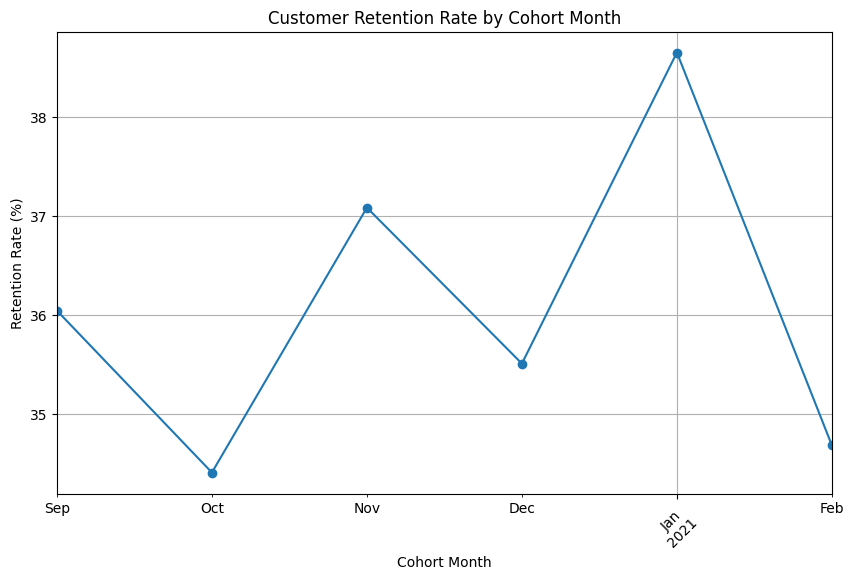

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
cohort_retention.plot(marker='o')
plt.title('Customer Retention Rate by Cohort Month')
plt.xlabel('Cohort Month')
plt.ylabel('Retention Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Nhận xét kết quả Cohort Retention Rate theo tháng mua đầu tiên

#### 1. Kết quả tổng quan

| Cohort Month | Retention Rate (%) |
|:--|:--|
| 2020-09 | 36.04% |
| 2020-10 | 34.41% |
| 2020-11 | 37.08% |
| 2020-12 | 35.51% |
| 2021-01 | 38.65% |
| 2021-02 | 34.69% |

Biểu đồ line chart cho thấy sự dao động của tỷ lệ retention theo từng tháng cohort.

#### 2. Phân tích xu hướng

- Nhìn chung, retention rate dao động trong khoảng từ **34% đến 39%**, không có sự biến động quá lớn giữa các tháng.
- **Cohort tháng 1/2021** có tỷ lệ retention cao nhất, đạt **38.65%**. Điều này có thể liên quan đến các chiến dịch đầu năm mới hoặc nhu cầu mua sắm đầu năm.
- **Cohort tháng 10/2020** có retention thấp nhất, ở mức **34.41%**. Đây có thể là thời điểm không có nhiều chương trình thúc đẩy khách quay lại mua hoặc có thể do hiệu ứng sau các đợt sale lớn chưa bắt đầu (trước tháng 11).
- Cohort tháng 11/2020 và tháng 12/2020 có mức retention khá ổn định quanh mức **35%–37%**, cho thấy các khách hàng giai đoạn cuối năm có xu hướng duy trì khả năng quay lại mua tương đối tốt.

#### 3. Ý nghĩa thực tiễn

- Việc tỷ lệ retention giữa các cohort dao động không nhiều cho thấy hành vi khách hàng khá ổn định theo thời gian, không bị ảnh hưởng quá mạnh bởi mùa vụ hoặc các sự kiện đặc biệt trong giai đoạn này.
- Cohort tháng 1/2021 nổi bật với retention cao nhất, gợi ý rằng các chiến dịch marketing hoặc sản phẩm trong thời gian đầu năm có thể đã hoạt động hiệu quả.
- Các chiến dịch chăm sóc khách hàng, upsell, hoặc remarketing nên đặc biệt tập trung vào các cohort mới, đồng thời duy trì nhịp chăm sóc đều đặn nhằm giữ vững tỷ lệ retention ổn định quanh mức 36–38%.

---


### Phân tích Retention Rate theo nhóm sản phẩm (Category)

#### 1. Mục tiêu
Phân tích tỷ lệ khách hàng quay lại mua hàng lần thứ hai theo từng nhóm sản phẩm (`category`).
Từ đó xác định những nhóm sản phẩm có khả năng giữ chân khách hàng tốt nhất.

In [76]:
# Với mỗi user, lấy giao dịch mua đầu tiên
first_purchases = purchases.sort_values(['user_id', 'event_time']).groupby('user_id').first()

# Gán category lần mua đầu tiên
first_purchases = first_purchases[['category_code', 'event_time']].copy()
first_purchases.rename(columns={'category_code': 'first_category'}, inplace=True)

print("=== Ví dụ 5 user đầu tiên và category lần mua đầu tiên ===")
print(first_purchases.head())


=== Ví dụ 5 user đầu tiên và category lần mua đầu tiên ===
                                       first_category  \
user_id                                                 
1515915625353286099        computers.peripherals.wifi   
1515915625353457259  computers.components.motherboard   
1515915625353534622                electronics.tablet   
1515915625353561691        computers.peripherals.wifi   
1515915625353900095      computers.peripherals.camera   

                                   event_time  
user_id                                        
1515915625353286099 2020-10-03 11:23:44+00:00  
1515915625353457259 2020-09-29 05:52:55+00:00  
1515915625353534622 2020-10-06 10:01:55+00:00  
1515915625353561691 2020-11-24 17:37:22+00:00  
1515915625353900095 2020-10-15 05:09:35+00:00  


In [77]:
# Với mỗi user, đếm số lần mua
purchase_counts = purchases.groupby('user_id').size()

# Xác định user có mua >= 2 lần
returning_users = purchase_counts[purchase_counts >= 2].index

# Gắn cờ "returning" vào bảng first_purchases
first_purchases['is_returning'] = first_purchases.index.isin(returning_users)

print("=== Ví dụ thêm cột is_returning ===")
print(first_purchases.head())


=== Ví dụ thêm cột is_returning ===
                                       first_category  \
user_id                                                 
1515915625353286099        computers.peripherals.wifi   
1515915625353457259  computers.components.motherboard   
1515915625353534622                electronics.tablet   
1515915625353561691        computers.peripherals.wifi   
1515915625353900095      computers.peripherals.camera   

                                   event_time  is_returning  
user_id                                                      
1515915625353286099 2020-10-03 11:23:44+00:00         False  
1515915625353457259 2020-09-29 05:52:55+00:00         False  
1515915625353534622 2020-10-06 10:01:55+00:00          True  
1515915625353561691 2020-11-24 17:37:22+00:00          True  
1515915625353900095 2020-10-15 05:09:35+00:00          True  


In [78]:
# Group theo first_category và tính retention rate
category_retention = (
    first_purchases.groupby('first_category')['is_returning']
    .agg(['count', 'sum'])  # count = tổng user, sum = số user quay lại
)

category_retention['retention_rate'] = (category_retention['sum'] / category_retention['count']) * 100

# Sắp xếp giảm dần theo retention_rate
category_retention = category_retention.sort_values('retention_rate', ascending=False)

print("=== Retention rate theo từng nhóm sản phẩm ===")
print(category_retention)


=== Retention rate theo từng nhóm sản phẩm ===
                                   count  sum  retention_rate
first_category                                               
auto.accessories.window                1    1           100.0
sport.bicycle                          2    2           100.0
appliances.kitchen.coffee_grinder      1    1           100.0
appliances.kitchen.fryer               6    6           100.0
appliances.kitchen.toster              1    1           100.0
...                                  ...  ...             ...
medicine.tools.tonometer              10    1            10.0
auto.accessories.immobilizer           2    0             0.0
electronics.camera.photo               4    0             0.0
computers.gaming                       1    0             0.0
auto.accessories.light                 1    0             0.0

[92 rows x 3 columns]


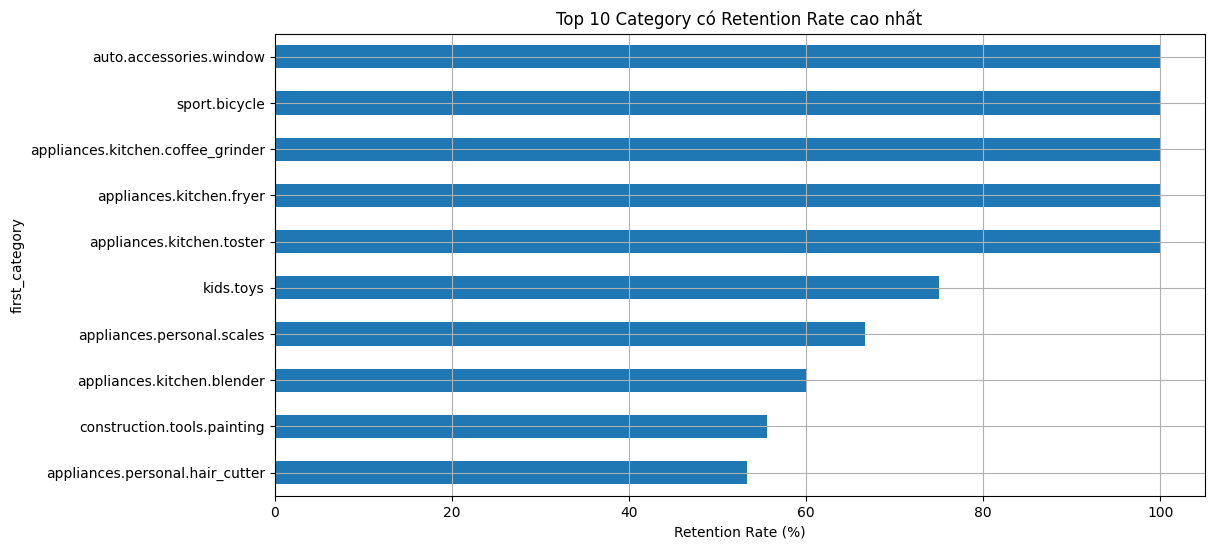

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
category_retention['retention_rate'].head(10).plot(kind='barh')
plt.title('Top 10 Category có Retention Rate cao nhất')
plt.xlabel('Retention Rate (%)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


### Nhận xét kết quả Retention Rate theo nhóm sản phẩm (Category)

#### 1. Kết quả tổng quan

Dựa trên biểu đồ và bảng dữ liệu, một số nhận xét nổi bật:

- Các nhóm sản phẩm có **Retention Rate rất cao** (gần như 100%) bao gồm:
  - `auto.accessories.window`
  - `sport.bicycle`
  - `appliances.kitchen.coffee_grinder`
  - `appliances.kitchen.fryer`
  - `appliances.kitchen.toster`
  
  Những nhóm này có 100% khách hàng quay lại mua lần thứ hai. Tuy nhiên cần lưu ý rằng một số nhóm chỉ có **1–2 user** mua lần đầu, nên tỷ lệ này có thể bị thiên lệch bởi sample size quá nhỏ.

- Một số nhóm sản phẩm khác cũng có **Retention Rate cao (trên 60%)**:
  - `kids.toys`
  - `appliances.personal.scales`
  - `appliances.kitchen.blender`

- Các nhóm sản phẩm có **Retention Rate thấp (dưới 20%)**:
  - `medicine.tools.tonometer`
  - `auto.accessories.immobilizer`
  - `electronics.camera.photo`
  - `computers.gaming`
  - `auto.accessories.light`
  
  Một số nhóm sản phẩm này thậm chí có **Retention Rate bằng 0%**, tức là không có khách nào quay lại mua lần hai.

#### 2. Phân tích sâu

- Các sản phẩm nhỏ, giá trị vừa phải hoặc có tính lặp lại trong nhu cầu (ví dụ: dụng cụ nhà bếp nhỏ, đồ chơi trẻ em) có khả năng giữ chân khách hàng tốt hơn.
- Các sản phẩm đặc thù hoặc giá trị cao như camera, phụ kiện ô tô, thiết bị y tế có tỷ lệ quay lại thấp hơn, hợp lý do nhu cầu mua lặp lại thấp.
- Một số nhóm retention cao nhưng **count thấp** (ví dụ chỉ có 1–2 người) cần phân tích thêm ở bước kế tiếp (lọc theo nhóm có đủ số lượng user để đảm bảo thống kê ổn định).

#### 3. Ý nghĩa thực tiễn

- Các chiến dịch upsell, cross-sell nên ưu tiên vào các nhóm sản phẩm có retention cao như đồ gia dụng nhỏ, đồ chơi trẻ em, phụ kiện cá nhân.
- Cần cẩn trọng khi đánh giá retention ở những nhóm có sample size nhỏ (< 10 user), để tránh bị ảnh hưởng bởi outlier.
- Các sản phẩm có retention thấp nên được phân tích thêm để xác định nguyên nhân: do giá trị sản phẩm, vòng đời dài, hay trải nghiệm khách hàng chưa tốt.

---


### Tổng kết phân tích Customer Retention

#### 1. Kết quả chính
| Khía cạnh | Insight nổi bật |
|-----------|-----------------|
| **Retention Rate (đơn hàng)** | 11.69 % khách quay lại mua ≥ 2 đơn hàng. |
| **Khoảng thời gian quay lại** | *Median* = 5 ngày · *Mean* ≈ 11 ngày (sau khi loại bỏ khoảng cách 0 ngày). 25 % khách quay lại trong 2 ngày; 75 % trong 14 ngày. |
| **Cohort theo tháng** | Retention dao động 34 % – 39 %; cao nhất ở **01-2021** (38.65 %), thấp nhất 10-2020 (34.41 %). Xu hướng tương đối ổn định, không biến động mạnh theo mùa vụ. |
| **Retention theo Category** | Đồ gia dụng nhỏ (blender, fryer, scales) và đồ chơi trẻ em có retention cao > 60 %; camera photo, phụ kiện ô-tô, thiết bị y tế có retention thấp < 20 %. Cần lưu ý kích thước mẫu với các nhóm quá nhỏ. |

---

#### 2. Đề xuất hành động

1. **Remarketing đúng “cửa sổ vàng”**  
   Gửi email / push ưu đãi trong **5 – 14 ngày** sau lần mua đầu tiên — khoảng thời gian 50-75 % khách quay lại.

2. **Tập trung vào nhóm sản phẩm giữ chân tốt**  
   - Đẩy gói combo, cross-sell cho **appliances.kitchen** nhỏ (fryer, blender, toaster) và **kids.toys**.  
   - Tăng hiển thị sản phẩm gợi ý, bundle kèm phụ kiện giá trị thấp dễ mua lặp lại.

3. **Cải thiện trải nghiệm nhóm retention thấp**  
   - **Camera photo, phụ kiện ô-tô**: xem lại giá, dịch vụ hậu mãi, nội dung hướng dẫn sử dụng.  
   - Khảo sát ngắn (NPS) với khách hàng thiết bị y tế để tìm nguyên nhân rời bỏ.

4. **Khai thác Cohort đầu năm**  
   - Cohort **01-2021** giữ chân cao nhất → kiểm tra lại chiến dịch/ưu đãi đã triển khai, nhân rộng thông điệp & kênh cho các đợt sau.

5. **Theo dõi KPI định kỳ**  
   - Thiết lập dashboard cập nhật **Retention Rate** & **Days-to-Repurchase** hàng tháng để phát hiện sớm xu hướng giảm và thử nghiệm A/B chiến dịch remarketing.

---

> **Kết luận**  
> Với Retention tổng 11.69 % và “cửa sổ quay lại” 5–14 ngày, doanh nghiệp nên tập trung chiến lược remarketing ngắn hạn vào giai đoạn này, ưu tiên các nhóm sản phẩm retention cao nhằm tối đa hóa giá trị vòng đời khách hàng.
